<a href="https://colab.research.google.com/github/Maxibrionest/FMY-Fundamentos-Machine-Learning/blob/main/Entrega3/Entrega3_FMY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

FMY-001V

# Entrega 1

## Parte 1 - Exploración de datos


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns

In [2]:
url = 'https://raw.githubusercontent.com/Maxibrionest/FMY-Fundamentos-Machine-Learning/main/Entrega1/boston_housing.csv'
df = pd.read_csv(url, sep=",")

In [3]:
df.head(5)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [4]:
df.sample(7)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315.0,16.4,392.89,6.57,21.9
419,11.81230,0.0,18.10,0,0.718,6.824,76.5,1.7940,24,666.0,20.2,48.45,22.74,8.4
358,5.20177,0.0,18.10,1,0.770,6.127,83.4,2.7227,24,666.0,20.2,395.43,11.48,22.7
166,2.01019,0.0,19.58,0,0.605,7.929,96.2,2.0459,5,403.0,14.7,369.30,3.70,50.0
328,0.06617,0.0,3.24,0,0.460,5.868,25.8,5.2146,4,430.0,16.9,382.44,9.97,19.3
207,0.25199,0.0,10.59,0,0.489,5.783,72.7,4.3549,4,277.0,18.6,389.43,18.06,22.5
241,0.10612,30.0,4.93,0,0.428,6.095,65.1,6.3361,6,300.0,16.6,394.62,12.40,20.1


In [5]:
#Se describen las columnas con su tipo de dato y señalando que no son nulos. Ademas se puede señalar que son 506 registros.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    float64
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


En base a la siguiente información del comando info, podemos deducir que no hay "Missing Values"

In [6]:
#El siguiente metodo devuelve una serie que contiene recuentos de filas unicas en el Data frame.
df.value_counts()

crim      zn    indus  chas  nox    rm     age    dis      rad  tax    ptratio  black   lstat  medv
88.97620  0.0   18.10  0     0.671  6.968  91.9   1.4165   24   666.0  20.2     396.90  17.21  10.4    1
0.12083   0.0   2.89   0     0.445  8.069  76.0   3.4952   2    276.0  18.0     396.90  4.21   38.7    1
0.10612   30.0  4.93   0     0.428  6.095  65.1   6.3361   6    300.0  16.6     394.62  12.40  20.1    1
0.10659   80.0  1.91   0     0.413  5.936  19.5   10.5857  4    334.0  22.0     376.04  5.57   20.6    1
0.10793   0.0   8.56   0     0.520  6.195  54.4   2.7778   5    384.0  20.9     393.49  13.00  21.7    1
                                                                                                      ..
1.25179   0.0   8.14   0     0.538  5.570  98.1   3.7979   4    307.0  21.0     376.57  21.02  13.6    1
1.27346   0.0   19.58  1     0.605  6.250  92.6   1.7984   5    403.0  14.7     338.92  5.50   27.0    1
1.34284   0.0   19.58  0     0.605  6.066  100.0  1.7573   5

In [7]:
df["crim"].describe()

count    506.000000
mean       3.613524
std        8.601545
min        0.006320
25%        0.082045
50%        0.256510
75%        3.677083
max       88.976200
Name: crim, dtype: float64

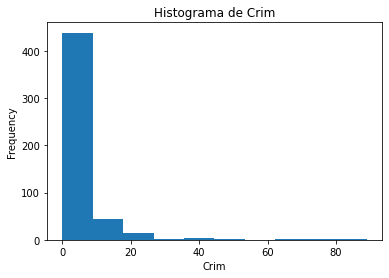

In [8]:
df["crim"].plot.hist()
plt.xlabel("Crim")
plt.title("Histograma de Crim")
plt.show()

La característica "crim" corresponde al porcentaje de criminalidad per cápita por ciudad. 

Su valor mínimo es 0.006320

Su valor máximo es 88.976200

Su promedio es 3.613524

Su desviación estandar es 8.601545

Entre 0 y 50 se encuentra la mayor cantidad de valores.



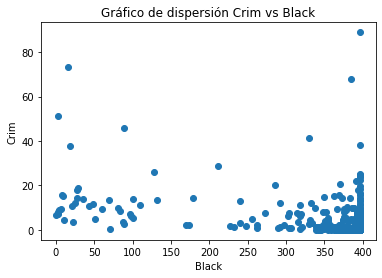

In [9]:
plt.scatter(df["black"], df["crim"])
plt.xlabel("Black")
plt.ylabel('Crim')
plt.title("Gráfico de dispersión Crim vs Black")
plt.show()

In [10]:
df["zn"].describe()

count    506.000000
mean      11.363636
std       23.322453
min        0.000000
25%        0.000000
50%        0.000000
75%       12.500000
max      100.000000
Name: zn, dtype: float64

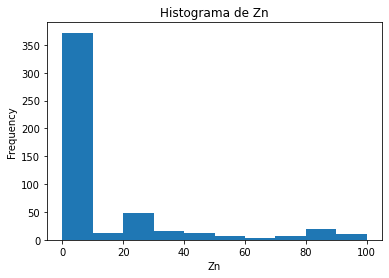

In [11]:
df["zn"].plot.hist()
plt.xlabel("Zn")
plt.title("Histograma de Zn")
plt.show()

La característica "zn" corresponde a la proporción de zonas residenciales para lotes sobre los 25,000 sq.ft.

Su valor mínimo es 0.000000

Su valor máximo es 100.000000

Su promedio es 11.363636

Su desviación estandar es 23.322453

Según el histograma podemos deducir que entre 0 y 10 se encuentra la moda, la cual presenta una alta frecuencia, con una diferencia muy marcada en relación a los otros rangos. El resto de valores se divide relativamente uniforme. 


In [12]:
df["indus"].describe()

count    506.000000
mean      11.136779
std        6.860353
min        0.460000
25%        5.190000
50%        9.690000
75%       18.100000
max       27.740000
Name: indus, dtype: float64

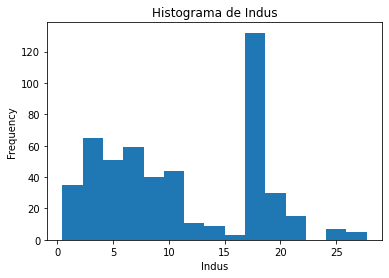

In [13]:
df["indus"].plot.hist(bins=15)
plt.xlabel("Indus")
plt.title("Histograma de Indus")
plt.show()

La característica "indus" corresponde a la proporción de acres de negocios que no sean de retail por ciudad.

Su valor mínimo es 0.460000

Su valor máximo es 27.740000

Su promedio es 11.136779

Desviación estandar 6.860353

Entre el rango de 0 a 14 podemos ver una relativa uniformidad.

Por otro lado cercano al valor 17 hay un notable crecimiento en la frecuencia. 








In [14]:
df["chas"].describe()

count    506.000000
mean       0.069170
std        0.253994
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: chas, dtype: float64

La característica "chas" equivale a la variable auxiliar sobre, si se encuentra cercano el rio.

Su valor mínimo es 0.000000

Su valor máximo es 1.000000

Su promedio es 0.069170

Desviación estandar 0.253994

Esta característica solo varía entre 0 y 1 sin poder tomar otros valores.
El 1 equivale a Si y el 0 a No.  

In [15]:
df.groupby("chas").size()

chas
0    471
1     35
dtype: int64

[]

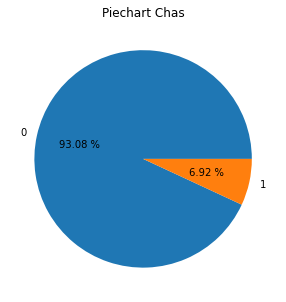

In [16]:
df.groupby("chas").size().plot.pie(title="Piechart Chas", label='', autopct="%0.2f %%", figsize=(5,5))
plt.plot()

Según el gráfico de torta, el 6,92 % de las casas colindan con el río y el 93,08 % No colindan con el río. 

In [17]:
df["nox"].describe()

count    506.000000
mean       0.554695
std        0.115878
min        0.385000
25%        0.449000
50%        0.538000
75%        0.624000
max        0.871000
Name: nox, dtype: float64

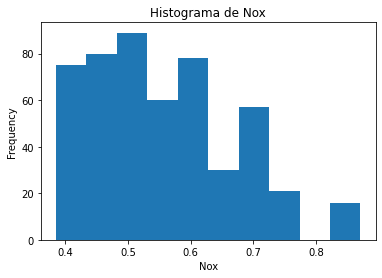

In [18]:
df["nox"].plot.hist()
plt.xlabel("Nox")
plt.title("Histograma de Nox")
plt.show()

La característica "nox" corresponde a los óxidos de nitrógeno medidos en partes por 10 millones. 

Su valor mínimo es 0.385000

Su valor máximo es 0.871000

Su promedio es 0.554695

Desviación estandar 0.115878

Según el histograma anterior podemos decir que la frecuencia es similar a la campana de gauss en descenso.

In [19]:
df["rm"].mode()

0    5.713
1    6.127
2    6.167
3    6.229
4    6.405
5    6.417
dtype: float64

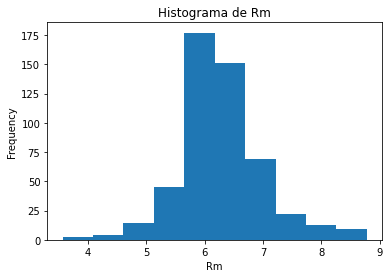

In [20]:
df["rm"].plot.hist()
plt.xlabel("Rm")
plt.title("Histograma de Rm")
plt.show()

La característica "rm" corresponde a el número promedio de habitaciones por vivienda.

Su valor mínimo es 3.561000

Su valor máximo es 8.780000

Su promedio es 6.284634

Desviación estandar 0.702617

En el histograma se puede notar que el promedio es similar a la mediana. 

Ádemas podemos observar que existen 6 modas que se encuentran en el intervalo de 5.713 y 6.417. 

Por otra parte podemos deducir que la mayor frecuencia se encuentra en el rango de 5,6486 y 6,1705.


In [21]:
df["age"].describe()

count    506.000000
mean      68.574901
std       28.148861
min        2.900000
25%       45.025000
50%       77.500000
75%       94.075000
max      100.000000
Name: age, dtype: float64

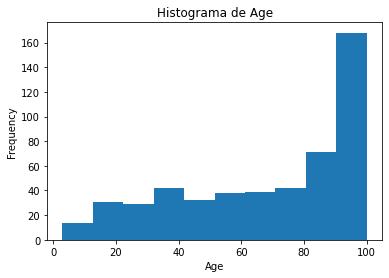

In [22]:
df["age"].plot.hist()
plt.xlabel("Age")
plt.title("Histograma de Age")
plt.show()

La característica "age" corresponde a unidades construidas ocupadas por sus dueños antes de 1940.

Su valor mínimo es 2.900000

Su valor máximo es 100.000000

Su promedio es 68.574901

Desviación estandar 28.148861

Según el histograma tenemos muchas ciudades de Boston que a la fecha de 1940 todas las casas estaban habitadas por sus dueños. 

Por otro lado la mayor frecuencia corresponde al rango del 90% a 100%, siendo esta cercano a 170. 

In [23]:
df["dis"].describe()

count    506.000000
mean       3.795043
std        2.105710
min        1.129600
25%        2.100175
50%        3.207450
75%        5.188425
max       12.126500
Name: dis, dtype: float64

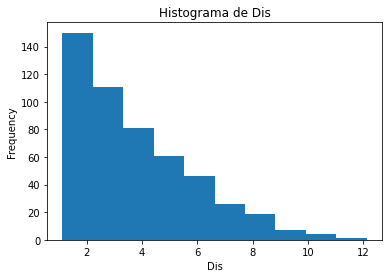

In [24]:
df["dis"].plot.hist()
plt.xlabel("Dis")
plt.title("Histograma de Dis")
plt.show()

La característica "dis" es el promedio ponderado de la distancia hacia 5 centros de empleo de Boston.

Su valor mínimo es 1.129600

Su valor máximo es 12.126500

Su promedio es 3.795043

Desviación estandar 2.105710

En el histrograma podemos notar una distribución binomial truncada. 


In [25]:
df["rad"].describe()

count    506.000000
mean       9.549407
std        8.707259
min        1.000000
25%        4.000000
50%        5.000000
75%       24.000000
max       24.000000
Name: rad, dtype: float64

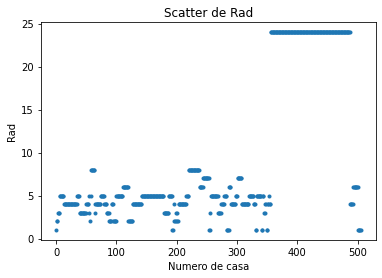

In [26]:
df["rad"].plot(ls="", marker=".")
plt.xlabel("Numero de casa")
plt.ylabel("Rad")
plt.title("Scatter de Rad")
plt.show()

In [27]:
df.groupby("rad").size()

rad
1      20
2      24
3      38
4     110
5     115
6      26
7      17
8      24
24    132
dtype: int64

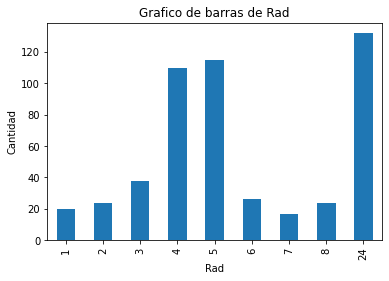

In [28]:
df.groupby("rad").size().plot.bar()
plt.xlabel("Rad")
plt.title("Grafico de barras de Rad")
plt.ylabel("Cantidad")
plt.show()

La característica "rad" corresponde al indice de accesibilidad a carreteras principales 

Su valor mínimo es 1.000000

Su valor máximo es 24.000000

Su promedio es 9.549407

Desviación estandar 8.707259

En el gráfico asociado a "rad" se puede notar 9 valores distintos y los mas frecuentes equivalen a 4, 5 y 24

In [29]:
df["tax"].describe()

count    506.000000
mean     408.237154
std      168.537116
min      187.000000
25%      279.000000
50%      330.000000
75%      666.000000
max      711.000000
Name: tax, dtype: float64

In [30]:
df.groupby("tax").size()

tax
187.0      1
188.0      7
193.0      8
198.0      1
216.0      5
        ... 
432.0      9
437.0     15
469.0      1
666.0    132
711.0      5
Length: 66, dtype: int64

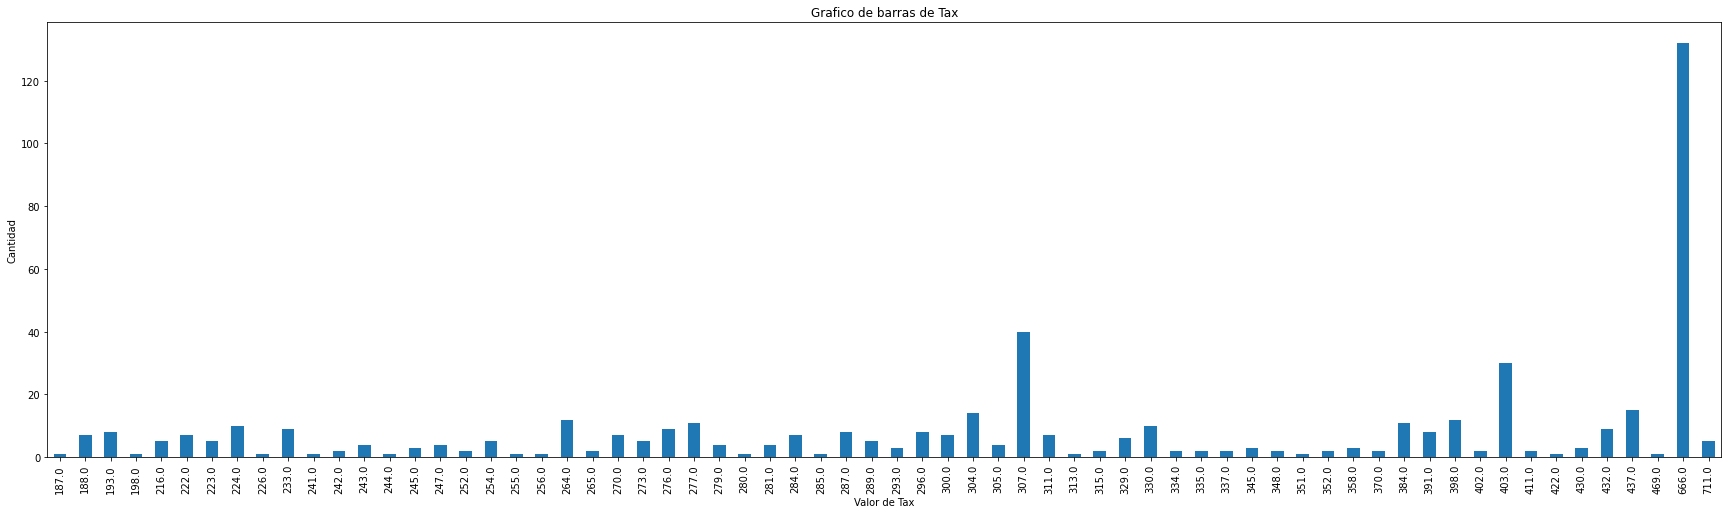

In [31]:
df.groupby("tax").size().plot.bar(figsize=(30,8))
plt.xlabel("Valor de Tax")
plt.ylabel('Cantidad')
plt.title("Grafico de barras de Tax")
plt.show()

La característica "tax" es la proporción de impuesto por propiedad como valor total cada $10,000.

Su valor mínimo es 187.000000

Su valor máximo es 711.000000

Su promedio es 408.237154

Desviación estandar 168.537116

Según el histograma tenemos 66 valores discretos posibles. El valor que más se repite es 666.0, 132 veces.


In [32]:
df["ptratio"].describe()

count    506.000000
mean      18.455534
std        2.164946
min       12.600000
25%       17.400000
50%       19.050000
75%       20.200000
max       22.000000
Name: ptratio, dtype: float64

In [33]:
df.groupby("ptratio").size().count()

46

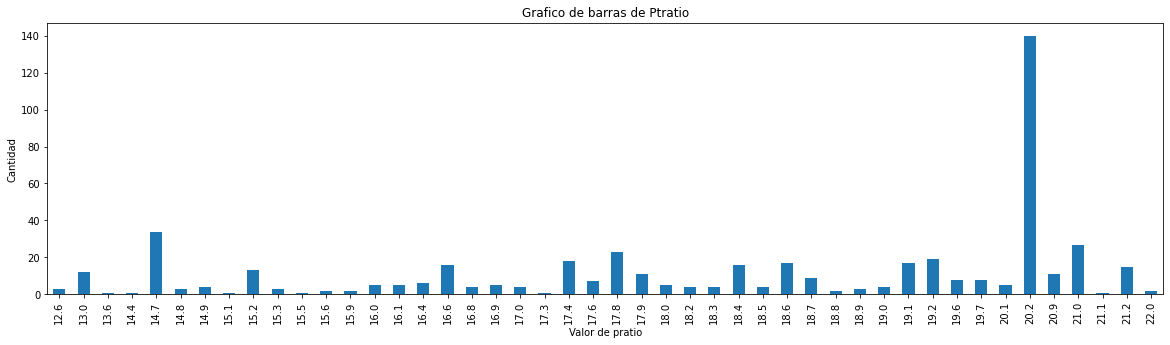

In [34]:
df.groupby("ptratio").size().plot.bar(figsize=(20,5))
plt.xlabel("Valor de pratio")
plt.ylabel("Cantidad")
plt.title("Grafico de barras de Ptratio")
plt.show()

La característica "ptratio" es la proporción estudiante promedio por ciudad. 

Su valor mínimo es 12.600000

Su valor máximo es 22.000000

Su promedio es 18.455534

Desviación estandar 2.164946

En base al gráfico de barra se puede concluir que existen 46 valores posibles y el más común es 20,2


In [35]:
df["black"].describe()

count    506.000000
mean     356.674032
std       91.294864
min        0.320000
25%      375.377500
50%      391.440000
75%      396.225000
max      396.900000
Name: black, dtype: float64

In [36]:
df.groupby("black").size().count()

357

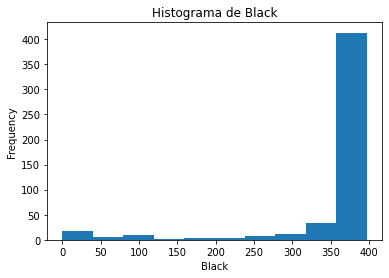

In [37]:
df["black"].plot.hist()
plt.xlabel("Black")
plt.title("Histograma de Black")
plt.show()

La característica "black" es 1000(Bk - 0.63)^2 donde Bk es la proporción de personas de color por ciudad. 

Su valor mínimo es 0.320000

Su valor máximo es 396.900000

Su promedio es 356.674032

Desviación estandar 91.294864

En el histograma las mayores frecuencias estan sobre los 350.



In [38]:
df["lstat"].describe()

count    506.000000
mean      12.653063
std        7.141062
min        1.730000
25%        6.950000
50%       11.360000
75%       16.955000
max       37.970000
Name: lstat, dtype: float64

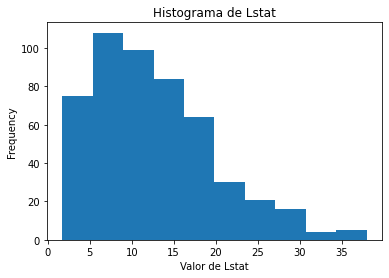

In [39]:
df["lstat"].plot.hist()
plt.xlabel("Valor de Lstat")
plt.title("Histograma de Lstat")
plt.show()

La característica "lstat" equivale al estatus más bajo de la población medido en porcentaje. Se refiere a la cantidad de población sin estudios secundarios completados, junto a los obreros.  

Su valor mínimo es 1.730000

Su valor máximo es 37.970000

Su promedio es 12.653063

Desviación estandar 7.141062

En el histograma se observa que el grueso de las ciudades tiene un 20% o menos de la población que no ha terminado los estudios secundarios.  



In [40]:
df["medv"].describe()

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: medv, dtype: float64

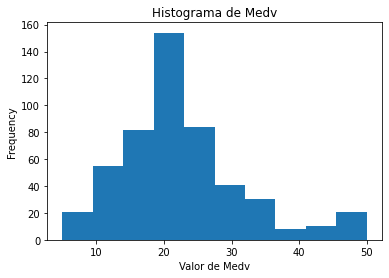

In [41]:
df["medv"].plot.hist()
plt.xlabel("Valor de Medv")
plt.title("Histograma de Medv")
plt.show()

La característica "medv" es el valor de la mediana de las casas ocupadas por sus dueños, medidas en $1000s. 

Su valor mínimo es 5.000000

Su valor máximo es 50.000000

Su promedio es 22.532806

Desviación estandar 9.197104

En el histograma notamos una distribución similar a una normal. 

## Parte 2 - Preparación de datos


### df.info()

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    float64
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


### Análisis

#### Exploración - definición de funciones útiles

#### Crim

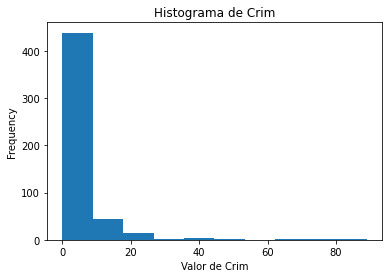

In [42]:
df["crim"].plot.hist()
plt.xlabel("Valor de Crim")
plt.title("Histograma de Crim")
plt.show()

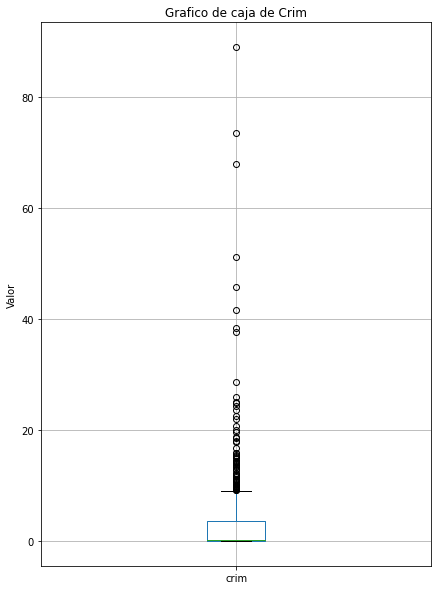

In [43]:
df.boxplot(column=["crim"],figsize=(7,10))
plt.ylabel('Valor')
plt.title("Grafico de caja de Crim")
plt.show()

En los diagramas de caja o _boxplot_ la caja central corresponde a a las demarcaciones de $Q_{1}$ y $Q_{3}$, la línea intermedia, poco visible en este caso, a la mediana, es decir $Q_{2}$, los "bigotes" a los límites no anómalos que van desde los valores máximo y mínimo o 1.5 IQR. Los círculos representan datos atípicos, fuera de los límites ya señalados.

Es visible la importante cantidad de datos fuera de los límites no atípicos (rango intercuartílico $\pm 1.5$ $IQR$, es donde están el 50% de los datos centrales, equivalente a $Q_{3} - Q_{1}$).

Lo señalado anteriormente fue extraído de *https://www.itl.nist.gov/div898/handbook/prc/section1/prc16.htm*, Instituto Nacional de Estándares y Tecnología de EE.UU.(NIST por sus siglas en inglés).

In [44]:
def clean_custom(df, col, iqrFences):
    q1 = df[col].quantile(.25)
    q3 = df[col].quantile(.75)
    iqr = q3-q1 #IQR definido anteriormente
    fence_low  = q1 - iqrFences * iqr
    fence_high = q3 + iqrFences * iqr
    df_out = df.loc[(df[col] > fence_low) & (df[col] < fence_high)]
    size = df_out.shape[0]
    pctg = size/df.shape[0]   # calcula el porcentaje de observaciones consideradas respecto al df original
    return df_out, pctg

def clean_outliers_hard(df, col):
    # elimina outliers fuera del rango +- 1.5 IQR de los cuartiles
    # En el boxplot, elimina los datos atípicos
    q1 = df[col].quantile(.25)
    q3 = df[col].quantile(.75)
    iqr = q3-q1 #IQR definido anteriormente
    fence_low  = q1 - 1.5*iqr
    fence_high = q3 + 1.5*iqr
    df_out = df.loc[(df[col] > fence_low) & (df[col] < fence_high)]
    return df_out

def clean_outliers_soft(df, col):
    # elimina outliers fuera del rango +- 3.0 IQR de los cuartiles
    # Dado que sus limites son mas amplios, elimina menos datos o equivalentemente considera mas datos
    q1 = df[col].quantile(.25)
    q3 = df[col].quantile(.75)
    iqr = q3-q1 #IQR definido anteriormente
    fence_low  = q1 - 3*iqr
    fence_high = q3 + 3*iqr
    df_out = df.loc[(df[col] > fence_low) & (df[col] < fence_high)]
    return df_out


In [45]:
#print(df[df["crim"].between(df["crim"].quantile(0.25), df["crim"].quantile(0.75))].shape[0])

0.9011857707509882


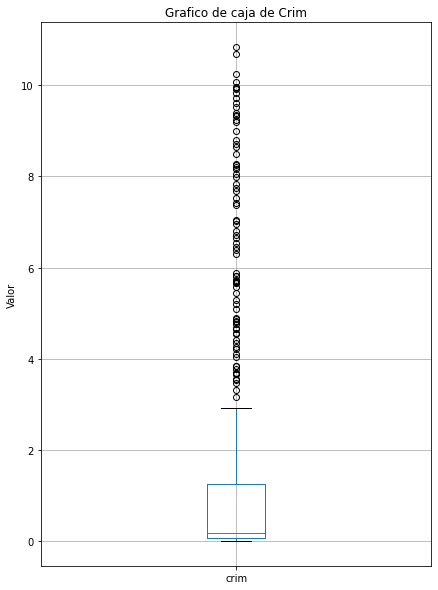

In [63]:
df_clean, df_clean_p = clean_custom(df, "crim", 2)
print(df_clean_p)

df_clean.boxplot(column=["crim"],figsize=(7,10))
plt.ylabel('Valor')
plt.title("Grafico de caja de Crim")
plt.show()

In [56]:
print(df.describe(), "\n")
print(df_clean.describe())

             crim          zn       indus  ...       black       lstat        medv
count  506.000000  506.000000  506.000000  ...  506.000000  506.000000  506.000000
mean     3.613524   11.363636   11.136779  ...  356.674032   12.653063   22.532806
std      8.601545   23.322453    6.860353  ...   91.294864    7.141062    9.197104
min      0.006320    0.000000    0.460000  ...    0.320000    1.730000    5.000000
25%      0.082045    0.000000    5.190000  ...  375.377500    6.950000   17.025000
50%      0.256510    0.000000    9.690000  ...  391.440000   11.360000   21.200000
75%      3.677083   12.500000   18.100000  ...  396.225000   16.955000   25.000000
max     88.976200  100.000000   27.740000  ...  396.900000   37.970000   50.000000

[8 rows x 14 columns] 

             crim          zn       indus  ...       black       lstat        medv
count  456.000000  456.000000  456.000000  ...  456.000000  456.000000  456.000000
mean     1.500031   12.609649   10.373268  ...  367.735175   1

In [57]:
df2 = clean_outliers_hard(df, "crim")
df3 = clean_outliers_soft(df, "crim")

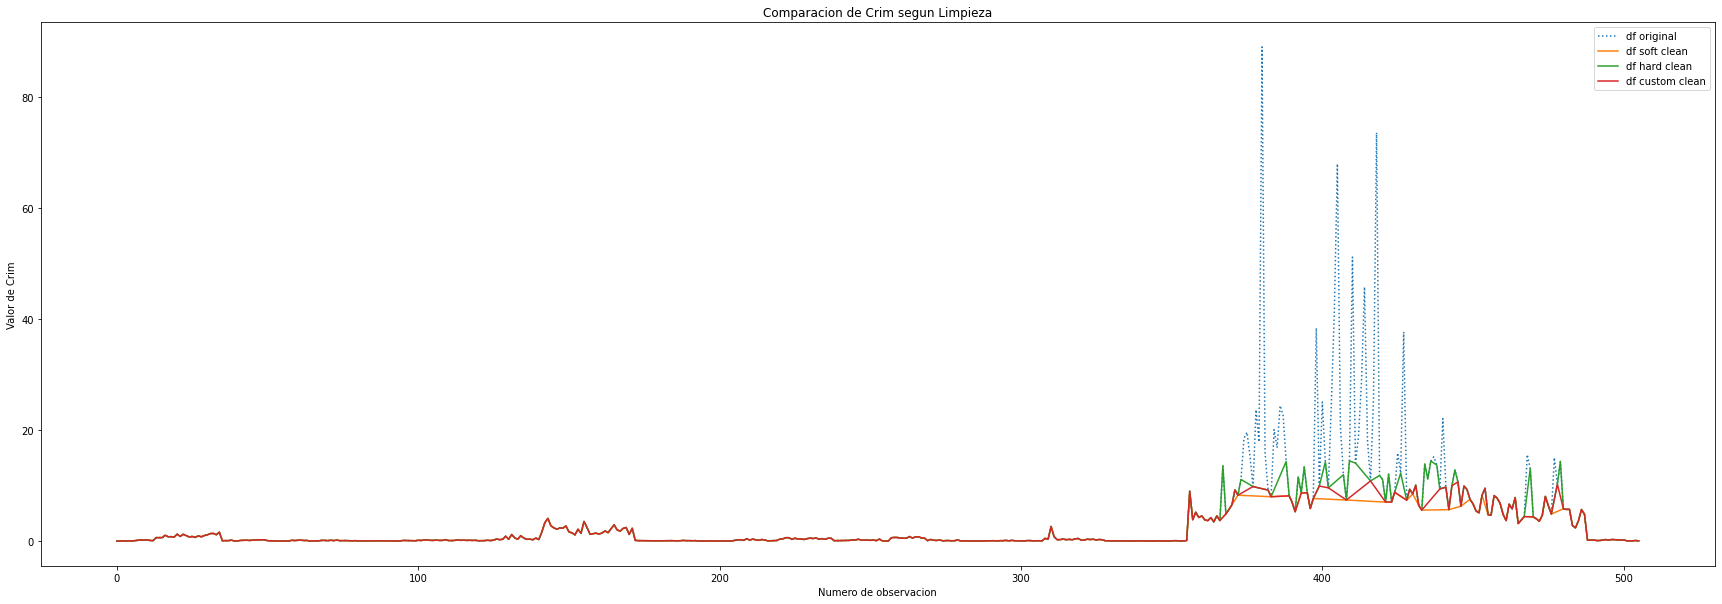

In [61]:
plt.figure(figsize=(30,10))
plt.plot(df["crim"], label="df original", ls=":", marker="")
plt.plot(df2["crim"], label="df soft clean")
plt.plot(df3["crim"], label="df hard clean")
plt.plot(df_clean["crim"], label="df custom clean")
plt.legend()
plt.xlabel("Numero de observacion")
plt.ylabel('Valor de Crim')
plt.title("Comparacion de Crim segun Limpieza")
plt.show()

In [91]:
df4_pct

0.9802371541501976

De lo anterior, ya que df4 contiene el 98.02% aproximadamente de los casos, se propone df4 como dataset limpio respecto a la característica ***crim***.

In [92]:
def print_medidas(df, col):
    #automatización de muestra de medidas de tendencia central y stdv
    print("Medidas de tendencia central: \n")
    print(df[col].describe(), "\n\n")
    print("Moda(s): \n")
    print(df[col].mode(), "\n\n")
    print("Mediana: \n")
    print(df[col].median(), "\n\n")
    print("Varianza: \n")
    print(df[col].var())

In [93]:
print_medidas(df4, "crim")

Medidas de tendencia central: 

count    496.000000
mean       2.679417
std        4.852691
min        0.006320
25%        0.080050
50%        0.243125
75%        2.844785
max       25.046100
Name: crim, dtype: float64 


Moda(s): 

0     0.01501
1    14.33370
dtype: float64 


Mediana: 

0.24312499999999998 


Varianza: 

23.548609949269835


En adelante, se reemplazara df4 por df_aux por estandarización. Se prosigue con el mismo análisis para las demás variables:

In [95]:
df_aux, df_aux_p = clean_custom(df, "crim", 6)

#### Zn

In [96]:
df_aux, df_aux_p = clean_custom(df, "zn", 6)
print("Proporción de datos considerados respecto al original: " , df_aux_p, "\n\n")
print_medidas(df_aux, "zn")

Proporción de datos considerados respecto al original:  0.9802371541501976 


Medidas de tendencia central: 

count    496.000000
mean       9.717742
std       20.429207
min        0.000000
25%        0.000000
50%        0.000000
75%        3.125000
max       85.000000
Name: zn, dtype: float64 


Moda(s): 

0    0.0
dtype: float64 


Mediana: 

0.0 


Varianza: 

417.35249266861985


De lo anterior, se propone df_aux como dataset limpio respecto a la característica zn.

#### Indus

In [107]:
df_aux, df_aux_p = clean_custom(df, "indus", 1)
print("Proporción de datos considerados respecto al original: " , df_aux_p, "\n\n")
print_medidas(df_aux, "indus")

Proporción de datos considerados respecto al original:  1.0 


Medidas de tendencia central: 

count    506.000000
mean      11.136779
std        6.860353
min        0.460000
25%        5.190000
50%        9.690000
75%       18.100000
max       27.740000
Name: indus, dtype: float64 


Moda(s): 

0    18.1
dtype: float64 


Mediana: 

9.69 


Varianza: 

47.064442473682135


De lo anterior, se propone df_aux como dataset limpio respecto a la característica indus.

#### Chas

In [110]:
df_aux, df_aux_p = clean_custom(df, "chas", 150)
print("Proporción de datos considerados respecto al original: " ,df_aux_p, "\n\n")
print_medidas(df_aux, "chas")

Proporción de datos considerados respecto al original:  0.0 


Medidas de tendencia central: 

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: chas, dtype: float64 


Moda(s): 

Series([], dtype: int64) 


Mediana: 

nan 


Varianza: 

nan


Dado que es una variable categórica, no tiene sentido separarla. Se toman todos los datos.

#### Nox

In [100]:
df_aux, df_aux_p = clean_custom(df, "nox", 6)
print("Proporción de datos considerados respecto al original: " ,df_aux_p, "\n\n")
print_medidas(df_aux, "nox")

Proporción de datos considerados respecto al original:  1.0 


Medidas de tendencia central: 

count    506.000000
mean       0.554695
std        0.115878
min        0.385000
25%        0.449000
50%        0.538000
75%        0.624000
max        0.871000
Name: nox, dtype: float64 


Moda(s): 

0    0.538
dtype: float64 


Mediana: 

0.5379999999999999 


Varianza: 

0.013427635718115328


De lo anterior, se propone df_aux como dataset limpio respecto a la característica nox.

#### Rm

In [103]:
df_aux, df_aux_p = clean_custom(df, "rm", 3)
print("Proporción de datos considerados respecto al original: " ,df_aux_p, "\n\n")
print_medidas(df_aux, "rm")

Proporción de datos considerados respecto al original:  0.9980237154150198 


Medidas de tendencia central: 

count    505.000000
mean       6.290028
std        0.692750
min        3.863000
25%        5.887000
50%        6.209000
75%        6.625000
max        8.780000
Name: rm, dtype: float64 


Moda(s): 

0    5.713
1    6.127
2    6.167
3    6.229
4    6.405
5    6.417
dtype: float64 


Mediana: 

6.209 


Varianza: 

0.4799025904997641


De lo anterior, se propone df_aux como dataset limpio respecto a la característica rm.

#### Age

In [ ]:
df_aux, df_aux_p = clean_custom(df, "age", 1)
print("Proporción de datos considerados respecto al original: " ,df_aux_p, "\n\n")
print_medidas(df_aux, "age")

Proporción de datos considerados respecto al original:  1.0 


Medidas de tendencia central: 

count    506.000000
mean      68.574901
std       28.148861
min        2.900000
25%       45.025000
50%       77.500000
75%       94.075000
max      100.000000
Name: age, dtype: float64 


Moda(s): 

0    100.0
dtype: float64 


Mediana: 

77.5 


Varianza: 

792.358398505069


De lo anterior, se propone df_aux como dataset limpio respecto a la característica age.

#### Dis

In [ ]:
df_aux, df_aux_p = clean_custom(df, "dis", 2)
print("Proporción de datos considerados respecto al original: " ,df_aux_p, "\n\n")
print_medidas(df_aux, "dis")

Proporción de datos considerados respecto al original:  0.9980237154150198 


Medidas de tendencia central: 

count    505.000000
mean       3.778545
std        2.074805
min        1.129600
25%        2.100000
50%        3.199200
75%        5.118000
max       10.710300
Name: dis, dtype: float64 


Moda(s): 

0    3.4952
dtype: float64 


Mediana: 

3.1992 


Varianza: 

4.304815499183719


De lo anterior, se propone df_aux como dataset limpio respecto a la característica dis.

#### Rad

In [ ]:
df_aux, df_aux_p = clean_custom(df, "rad", 1)
print("Proporción de datos considerados respecto al original: " ,df_aux_p, "\n\n")
print_medidas(df_aux, "rad")

Proporción de datos considerados respecto al original:  1.0 


Medidas de tendencia central: 

count    506.000000
mean       9.549407
std        8.707259
min        1.000000
25%        4.000000
50%        5.000000
75%       24.000000
max       24.000000
Name: rad, dtype: float64 


Moda(s): 

0    24
dtype: int64 


Mediana: 

5.0 


Varianza: 

75.81636598442468


De lo anterior, se propone df_aux como dataset limpio respecto a la característica rad.

#### Tax

In [ ]:
df_aux, df_aux_p = clean_custom(df, "tax", 1)
print("Proporción de datos considerados respecto al original: " ,df_aux_p, "\n\n")
print_medidas(df_aux, "tax")

Proporción de datos considerados respecto al original:  1.0 


Medidas de tendencia central: 

count    506.000000
mean     408.237154
std      168.537116
min      187.000000
25%      279.000000
50%      330.000000
75%      666.000000
max      711.000000
Name: tax, dtype: float64 


Moda(s): 

0    666.0
dtype: float64 


Mediana: 

330.0 


Varianza: 

28404.759488122803


De lo anterior, se propone df_aux como dataset limpio respecto a la característica tax.

#### Ptratio

In [ ]:
df_aux, df_aux_p = clean_custom(df, "ptratio", 2)
print("Proporción de datos considerados respecto al original: " ,df_aux_p, "\n\n")
print_medidas(df_aux, "ptratio")

Proporción de datos considerados respecto al original:  1.0 


Medidas de tendencia central: 

count    506.000000
mean      18.455534
std        2.164946
min       12.600000
25%       17.400000
50%       19.050000
75%       20.200000
max       22.000000
Name: ptratio, dtype: float64 


Moda(s): 

0    20.2
dtype: float64 


Mediana: 

19.05 


Varianza: 

4.686989120651217


De lo anterior, se propone df_aux como dataset limpio respecto a la característica ptratio.

#### Black

In [ ]:
df_aux, df_aux_p = clean_custom(df, "black", 17)
print("Proporción de datos considerados respecto al original: " ,df_aux_p, "\n\n")
print_medidas(df_aux, "black")

Proporción de datos considerados respecto al original:  0.9782608695652174 


Medidas de tendencia central: 

count    495.000000
mean     364.434424
std       75.787420
min       21.570000
25%      376.715000
50%      391.930000
75%      396.290000
max      396.900000
Name: black, dtype: float64 


Moda(s): 

0    396.9
dtype: float64 


Mediana: 

391.93 


Varianza: 

5743.732958726535


De lo anterior, se propone df_aux como dataset limpio respecto a la característica black. Notar que al incrementar el porcentaje acaparado mayor a 97%, se deben tomar limites muy amplios.

#### Lstat

In [ ]:
df_aux, df_aux_p = clean_custom(df, "lstat", 2)
print("Proporción de datos considerados respecto al original: " ,df_aux_p, "\n\n")
print_medidas(df_aux, "lstat")

Proporción de datos considerados respecto al original:  0.9960474308300395 


Medidas de tendencia central: 

count    504.000000
mean      12.554563
std        6.981190
min        1.730000
25%        6.927500
50%       11.330000
75%       16.910000
max       34.770000
Name: lstat, dtype: float64 


Moda(s): 

0     6.36
1     7.79
2     8.05
3    14.10
4    18.13
dtype: float64 


Mediana: 

11.33 


Varianza: 

48.73701094228281


De lo anterior, se propone df_aux como dataset limpio respecto a la característica lstat.

#### Medv

In [ ]:
df_aux, df_aux_p = clean_custom(df, "medv", 3)
print("Proporción de datos considerados respecto al original: " ,df_aux_p, "\n\n")
print_medidas(df_aux, "medv")

Proporción de datos considerados respecto al original:  0.9683794466403162 


Medidas de tendencia central: 

count    490.000000
mean      21.635918
std        7.865301
min        5.000000
25%       16.700000
50%       20.900000
75%       24.675000
max       48.800000
Name: medv, dtype: float64 


Moda(s): 

0    25.0
dtype: float64 


Mediana: 

20.9 


Varianza: 

61.862960811318366


De lo anterior, se propone df_aux como dataset limpio respecto a la característica medv. Al incrementar Desde 3.0 a 3.15 se salta del 96.84% aprox al 100%, sañalando datos outliers ahí.

# Entrega 24-05-2021



In [ ]:
X = df.drop(['medv'],axis=1)
Y = df.medv.copy()

In [ ]:
Y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: medv, Length: 506, dtype: float64

In [ ]:
X.isna().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
dtype: int64

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X, Y)

Y_hat = model.predict(X)

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(Y, Y_hat)

21.894831181729206

In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(Y, Y_hat)

3.2708628109003164

In [ ]:
from sklearn.metrics import r2_score
r2_score(Y, Y_hat)

0.7406426641094094

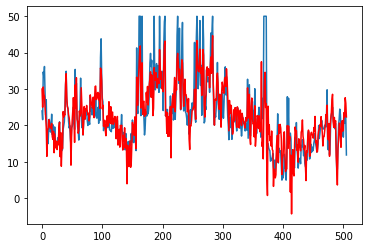

In [ ]:
import matplotlib.pyplot as plt
plt.plot(Y)
plt.plot(Y_hat, 'r')

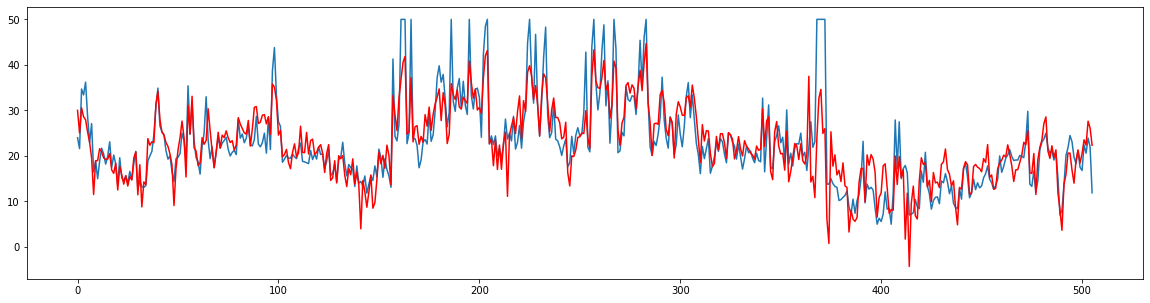

In [ ]:
plt.subplots(figsize=(20,5))
plt.plot(Y)
plt.plot(Y_hat, 'r')

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,Y,test_size=0.2, train_size=0.8)

In [ ]:
print(Xtrain.shape)
print(Xtest.shape)

(404, 13)
(102, 13)


In [ ]:
model2 = LinearRegression()

model2.fit(Xtrain, Ytrain)

Y_hat = model2.predict(Xtest)

print(mean_squared_error(Ytest, Y_hat))
print(mean_absolute_error(Ytest, Y_hat))
print(r2_score(Ytest, Y_hat))

plt.plot(Y_hat, 'r')
plt.plot(Ytest, 'g')

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
XscaledSS = scaler.transform(X)

In [ ]:
mo1 = LinearRegression()
mo1.fit(XscaledSS, Y)
YhatSS = mo1.predict(Xscaled)

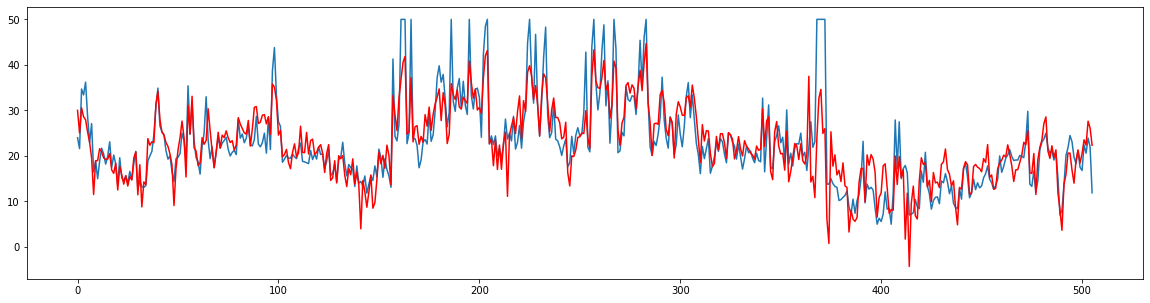

In [ ]:
plt.subplots(figsize=(20,5))
plt.plot(Y)
plt.plot(YhatSS, 'r')

In [ ]:
XscaledSS[0]

array([-0.41978194,  0.28482986, -1.2879095 , -0.27259857, -0.14421743,
        0.41367189, -0.12001342,  0.1402136 , -0.98284286, -0.66660821,
       -1.45900038,  0.44105193, -1.0755623 ])

In [ ]:
df.iloc[0]

crim         0.00632
zn          18.00000
indus        2.31000
chas         0.00000
nox          0.53800
rm           6.57500
age         65.20000
dis          4.09000
rad          1.00000
tax        296.00000
ptratio     15.30000
black      396.90000
lstat        4.98000
medv        24.00000
Name: 0, dtype: float64

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scalerN = MinMaxScaler()
scalerN.fit(X)
XscaledNMMS = scalerN.transform(X)


In [ ]:
mo2 = LinearRegression()
mo2.fit(Xscaled, Y)
YhatMMS = mo2.predict(Xscaled)

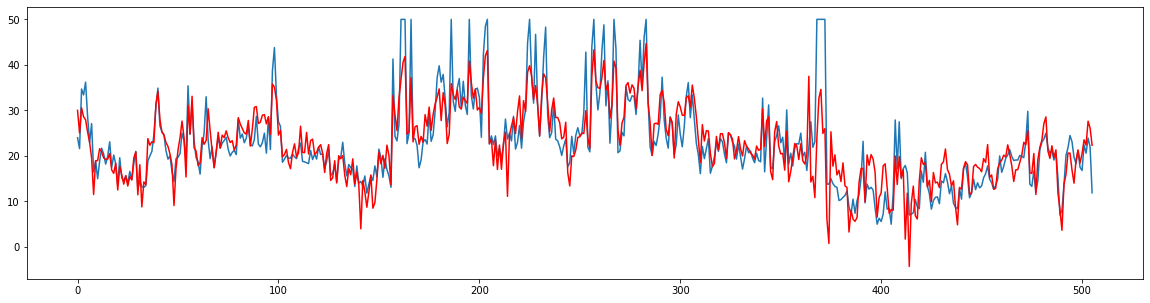

In [ ]:
plt.subplots(figsize=(20,5))
plt.plot(Y)
plt.plot(YhatMMS, 'r')

In [ ]:
XscaledNMMS[0]

array([0.        , 0.18      , 0.06781525, 0.        , 0.31481481,
       0.57750527, 0.64160659, 0.26920314, 0.        , 0.20801527,
       0.28723404, 1.        , 0.08967991])

In [ ]:
df.iloc[0]

crim         0.00632
zn          18.00000
indus        2.31000
chas         0.00000
nox          0.53800
rm           6.57500
age         65.20000
dis          4.09000
rad          1.00000
tax        296.00000
ptratio     15.30000
black      396.90000
lstat        4.98000
medv        24.00000
Name: 0, dtype: float64

In [ ]:
import pandas as pd
X = df.drop(['medv'],axis=1)
Y = df.medv.copy()

In [ ]:
X

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48


In [ ]:
from sklearn.tree import DecisionTreeRegressor

mo3 = DecisionTreeRegressor()
mo3.fit(X, Y)

YhatDT = mo3.predict(X)

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

mse = mean_squared_error(Y, YhatDT)
mae = mean_absolute_error(Y, YhatDT)
R2 = r2_score(Y, YhatDT)

print("MSE: ",mse)
print("MAE: ",mae)
print("R^2: ",R2)

MSE:  0.0
MAE:  0.0
R^2:  1.0


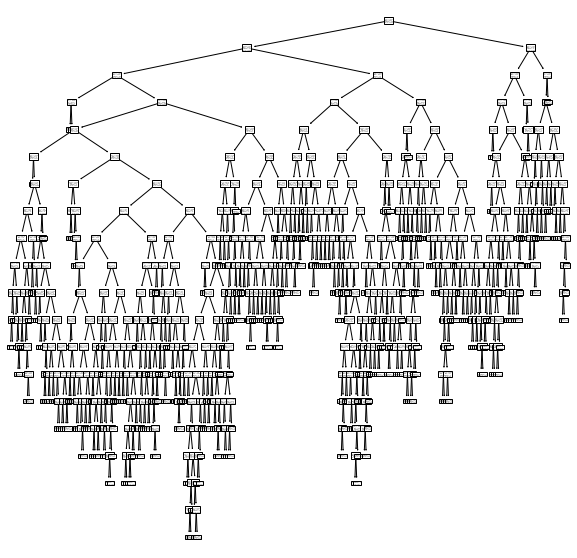

In [ ]:
import matplotlib.pyplot as plt
from sklearn import tree
plt.subplots(1,1,figsize=(10,10))
_= tree.plot_tree(mo2)

In [ ]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,Y,test_size=0.2)

In [ ]:
from sklearn.tree import DecisionTreeRegressor

mo3 = DecisionTreeRegressor()
mo3.fit(Xtrain, Ytrain)

YhatDT = mo3.predict(Xtest)

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

mse = mean_squared_error(Ytest, YhatDT)
mae = mean_absolute_error(Ytest, YhatDT)
R2 = r2_score(Ytest, YhatDT)

print("MSE: ",mse)
print("MAE: ",mae)
print("R^2: ",R2)

MSE:  50.04803921568628
MAE:  4.245098039215687
R^2:  0.33038517514646015


In [ ]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,Y,test_size=0.2)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
import numpy as np
from sklearn.model_selection import GridSearchCV

model = DecisionTreeRegressor()
params = {"max_depth": np.arange(3, 10),          # [3,4,5]
          "min_samples_split": np.arange(2, 10)}  # [2,3,4]
grid = GridSearchCV(estimator=model, param_grid=params,cv=10)
grid.fit(Xtrain, Ytrain)

GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=None,
                                             splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': array([3, 4, 5, 6, 7, 8, 9]),
                         'min_samples_split': array([2, 3, 4, 5, 6, 7, 8, 9])},
      

In [ ]:
print(grid.best_score_)
print(grid.best_params_)

0.8195892251349157
{'max_depth': 7, 'min_samples_split': 5}


In [ ]:
grid = GridSearchCV(estimator=model, param_grid=params,cv=10, scoring='r2')
grid.fit(Xtrain, Ytrain)

GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=None,
                                             splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': array([3, 4, 5, 6, 7, 8, 9]),
                         'min_samples_split': array([2, 3, 4, 5, 6, 7, 8, 9])},
      

In [ ]:
print(grid.best_score_)
print(grid.best_params_)

0.8239527020412055
{'max_depth': 8, 'min_samples_split': 3}


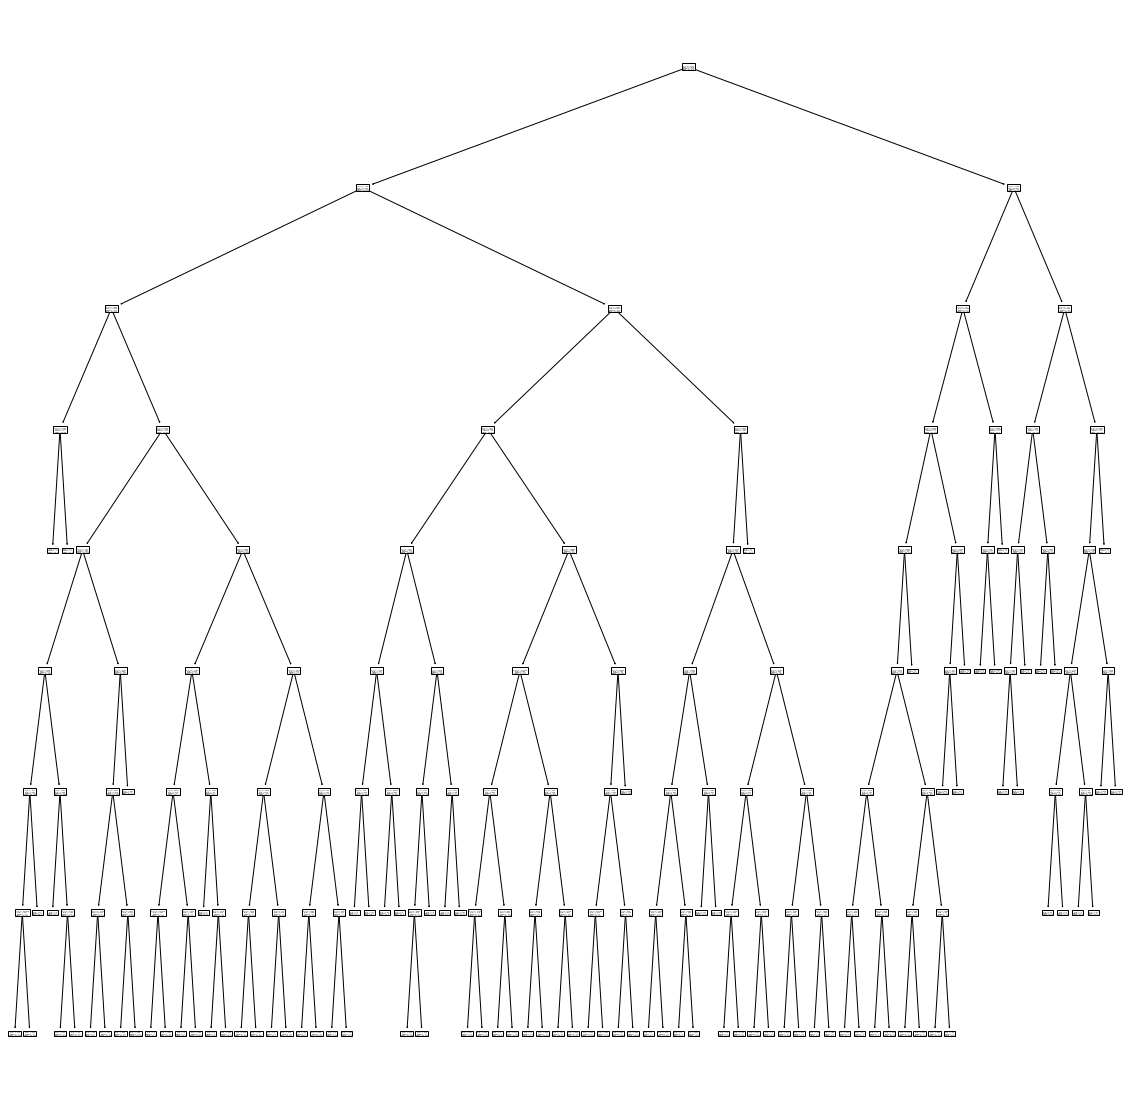

In [ ]:
import matplotlib.pyplot as plt
from sklearn import tree
plt.subplots(1,1,figsize=(20,20))
_= tree.plot_tree(grid.best_estimator_)

20.86116649092642
2.738656912259853
0.731293723372862


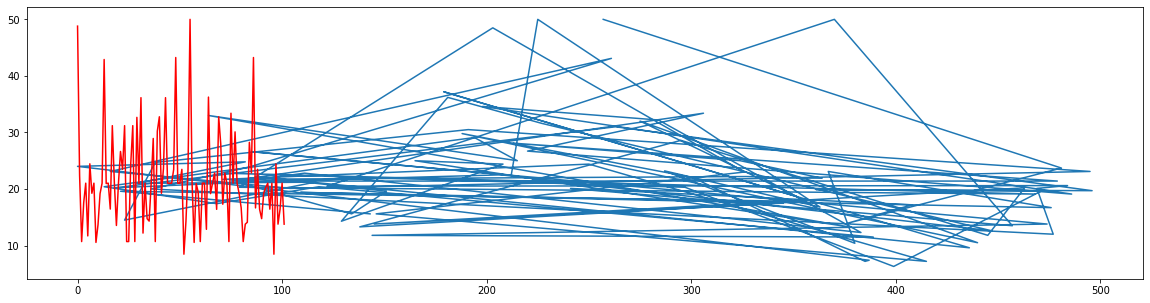

In [ ]:
YhatDT = grid.predict(Xtest)

print(mean_squared_error(Ytest, YhatDT))
print(mean_absolute_error(Ytest, YhatDT))
print(r2_score(Ytest, YhatDT))

import matplotlib.pyplot as plt
plt.subplots(figsize=(20,5))
plt.plot(Ytest)
plt.plot(YhatDT, 'r')